In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('lsd_math_score_data.csv')

In [3]:
data

,Time_Delay_in_Minutes,LSD_ppm,Avg_Math_Test_Score
0,5,1.17,78.93
1,15,2.97,58.20
2,30,3.26,67.47
3,60,4.69,37.47
4,120,5.83,45.65
5,240,6.00,32.92
6,480,6.41,29.97


In [4]:
# select the single columns
data['Avg_Math_Test_Score']

0    78.93
1    58.20
2    67.47
3    37.47
4    45.65
5    32.92
6    29.97
Name: Avg_Math_Test_Score, dtype: float64

In [5]:
# add new column
data['new_column'] = data['Avg_Math_Test_Score'] + 100
data['new_column_2'] = data['new_column'] ** 2

In [6]:
data

,Time_Delay_in_Minutes,LSD_ppm,Avg_Math_Test_Score,new_column,new_column_2
0,5,1.17,78.93,178.93,32015.9449
1,15,2.97,58.20,158.20,25027.2400
2,30,3.26,67.47,167.47,28046.2009
3,60,4.69,37.47,137.47,18898.0009
4,120,5.83,45.65,145.65,21213.9225
5,240,6.00,32.92,132.92,17667.7264
6,480,6.41,29.97,129.97,16892.2009


In [7]:
type(data)

pandas.core.frame.DataFrame

In [8]:
# when we extrac the single column from hte dataframe, we got series
# series s smilarly to array but has only one dimension, array can have 1, 2, 3, ... dimensions
print(type(data['new_column']), data['new_column'])

<class 'pandas.core.series.Series'> 0    178.93
1    158.20
2    167.47
3    137.47
4    145.65
5    132.92
6    129.97
Name: new_column, dtype: float64


In [9]:
# series has the "name" and "dtype" arttibute as you see above
# now we've actually just make a discovery about the nature of pandas's dataframe
# pandas's dataframe is essentailly made uup of a collection of series

In [10]:
# create new dataframe 
# first time i write this
dataframe = pd.DataFrame(data, columns=['LSD_ppm', 'Avg_Math_Test_Score'])

In [11]:
dataframe

,LSD_ppm,Avg_Math_Test_Score
0,1.17,78.93
1,2.97,58.20
2,3.26,67.47
3,4.69,37.47
4,5.83,45.65
5,6.00,32.92
6,6.41,29.97


In [12]:
#anothers way to create new dataframe
columns_name = ['LSD_ppm', 'Avg_Math_Test_Score']
dataframe = data[columns_name]
# like, dataframe = data[['LSD_ppm', 'Avg_Math_Test_Score']]

In [13]:
dataframe

,LSD_ppm,Avg_Math_Test_Score
0,1.17,78.93
1,2.97,58.20
2,3.26,67.47
3,4.69,37.47
4,5.83,45.65
5,6.00,32.92
6,6.41,29.97


In [14]:
# becareful df = data[['column_name']] is not equal to df = data['column_name']
# FIRST, we got an DataFrame object
# SECOND, we got an Series object

In [15]:
# to delete the column in the dataframe
del dataframe['LSD_ppm']
dataframe

,Avg_Math_Test_Score
0,78.93
1,58.20
2,67.47
3,37.47
4,45.65
5,32.92
6,29.97


In [16]:
# dataframe's syntax work as dict in python

In [17]:
import matplotlib.pyplot as plt
from pandas import DataFrame
from sklearn.linear_model import LinearRegression

In [18]:
dataframe = pd.DataFrame(data, columns=['LSD_ppm', 'Avg_Math_Test_Score'])
dataframe

,LSD_ppm,Avg_Math_Test_Score
0,1.17,78.93
1,2.97,58.20
2,3.26,67.47
3,4.69,37.47
4,5.83,45.65
5,6.00,32.92
6,6.41,29.97


In [19]:
LSD = dataframe[['LSD_ppm']]  # or LSD = DataFrame(dataframe, columns=['LSD_ppm'])
avg = dataframe[['Avg_Math_Test_Score']]  # or or LSD = DataFrame(dataframe, columns=['Avg_Math_Test_Score'])

In [20]:
reg = LinearRegression()
reg.fit(LSD, avg)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

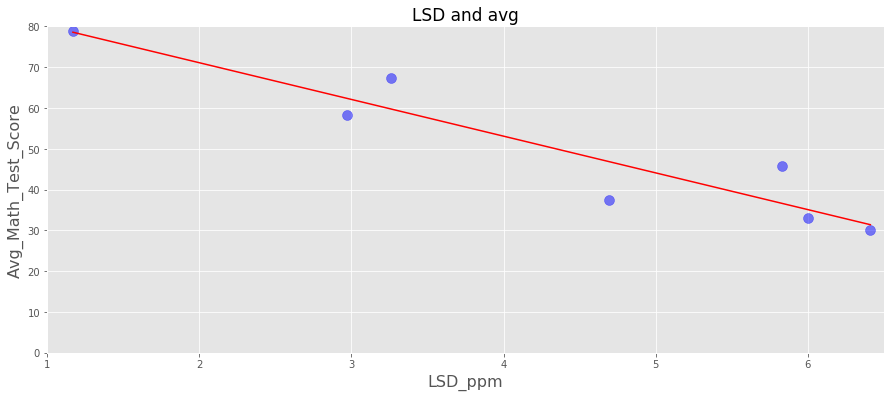

In [45]:
%matplotlib inline
plt.figure(figsize=(15, 6))
plt.scatter(LSD, avg, alpha=0.5, color='blue', s=100)
plt.plot(LSD, reg.predict(LSD), color='red', label="plot A") 

plt.style.use('ggplot')
plt.title('LSD and avg', fontsize=17)
plt.xlabel('LSD_ppm', fontsize=16)
plt.ylabel('Avg_Math_Test_Score', fontsize=16)
plt.xlim(1, 6.5)
plt.ylim(0, 80)
plt.show()

In [33]:
print('hsub(thata) = {0}x + {1}'.format(reg.coef_[0][0], reg.intercept_[0]))
print('score(r-square) :', reg.score(LSD, avg))

hsub(thata) = -9.009466415296785x + 89.12387376799308
score(r-square) : 0.8778349707775889
